In this note, before starting modelling and clustering, I will analyse the data distribution and characterics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
films = pd.read_csv('films_NaNs_treated.csv')

In [3]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],1800-01-01,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],1800-01-01,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],1800-01-01,1800-01-01,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],1800-01-01,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],1800-01-01,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,0


Let's analyce the audience score. The audience score is calculated by dividing the number of people who gave the film a rating of 3.5 stars or higher by the total number of people who rated the film, and multiplying by 100. A film with an audience score of 90% means that 90% of the people who rated the film gave it 3.5 stars or higher. https://www.rottentomatoes.com/faq#:~:text=The%20Tomatometer%20score%20is%20calculated,Tomatometer%20and%20the%20Audience%20Score.

Excluding the non-value of 0

In [4]:
non_zero_scores_as = films['audienceScore'][films['audienceScore'] != 0]

In [5]:
non_zero_scores_as.describe()

count    72105.000000
mean        56.557520
std         23.717564
min          1.000000
25%         38.000000
50%         58.000000
75%         76.000000
max        100.000000
Name: audienceScore, dtype: float64

The mean is 57 which makes the score in the data non-inflationated as we can observed in other cases.

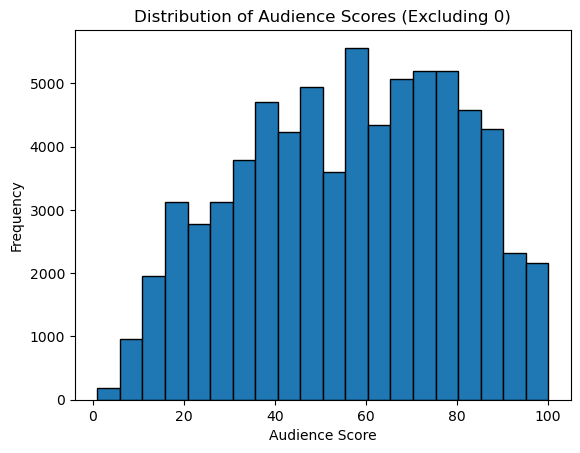

In [6]:
plt.hist(non_zero_scores_as, bins=20, edgecolor='black')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.title('Distribution of Audience Scores (Excluding 0)')
plt.show()

Distribution of Audience score seems to be well distributed with a light unbalanced on the right

Now, let' analyse the distribution of the critique rating. The audience score is calculated by dividing the number of people who gave the film a rating of 3.5 stars or higher by the total number of people who rated the film, and multiplying by 100. A film with an audience score of 90% means that 90% of the people who rated the film gave it 3.5 stars or higher. https://www.rottentomatoes.com/faq#:~:text=The%20Tomatometer%20score%20is%20calculated,Tomatometer%20and%20the%20Audience%20Score.

In [7]:
non_zero_scores_tm = films['tomatoMeter'][films['tomatoMeter'] != 0]

In [8]:
non_zero_scores_tm.describe()

count    33171.000000
mean        67.170179
std         26.607980
min          1.000000
25%         48.000000
50%         74.000000
75%         89.000000
max        100.000000
Name: tomatoMeter, dtype: float64

Suprisingly the mean of the percentage of positive rating is higher for the critique than general users

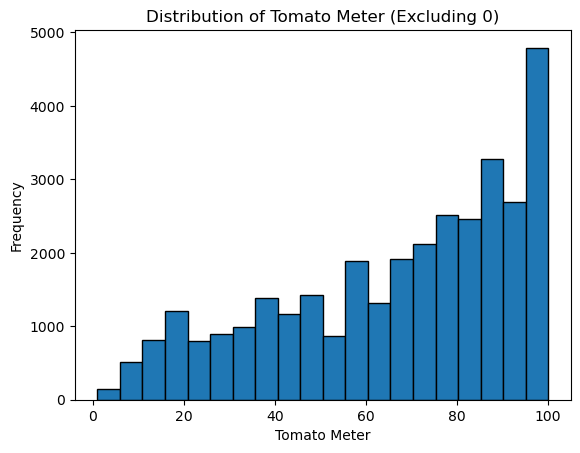

In [9]:
plt.hist(non_zero_scores_tm, bins=20, edgecolor='black')
plt.xlabel('Tomato Meter')
plt.ylabel('Frequency')
plt.title('Distribution of Tomato Meter (Excluding 0)')
plt.show()

The distribution here is more clearly imbalanced on the right side. In this case we have less data.

In [10]:
non_zero_scores_box_office = films['boxOffice'][films['boxOffice'] != 0]

In [11]:
non_zero_scores_box_office.describe()

count    1.474000e+04
mean     1.829888e+07
std      4.814704e+07
min      2.000000e+00
25%      5.150000e+04
50%      6.524500e+05
75%      1.410000e+07
max      8.584000e+08
Name: boxOffice, dtype: float64

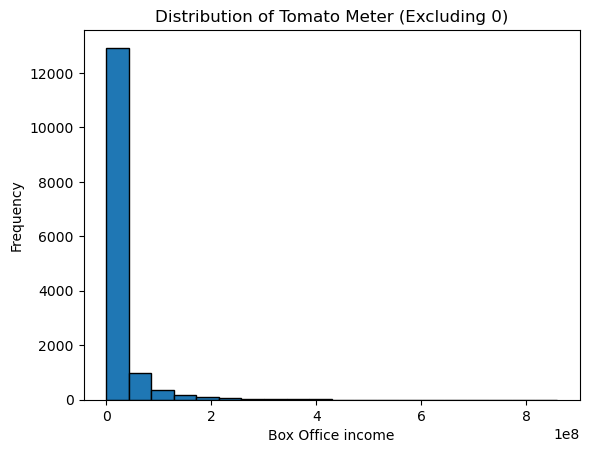

In [12]:
plt.hist(non_zero_scores_box_office, bins=20, edgecolor='black')
plt.xlabel('Box Office income')
plt.ylabel('Frequency')
plt.title('Distribution of Tomato Meter (Excluding 0)')
plt.show()

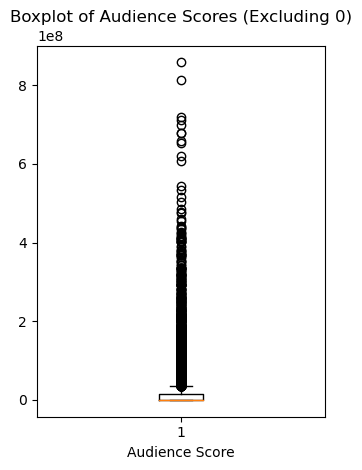

In [13]:
plt.subplot(1, 2, 2)
plt.boxplot(non_zero_scores_box_office)
plt.xlabel('Audience Score')
plt.title('Boxplot of Audience Scores (Excluding 0)')

plt.tight_layout()
plt.show()

Here, the ditribution is extremely imbalanced on the left. many films managed to gross a very low value while a small minority had outstanding results

In [14]:
top_20_films = films.nlargest(20, 'boxOffice')
top_20_titles = top_20_films['title']
print(top_20_titles)

106918                             Avengers: Endgame
141920                       Spider-Man: No Way Home
71018                              Top Gun: Maverick
18819                                Confess, Fletch
40663                                  Black Panther
104010                        Avengers: Infinity War
85064                       Avatar: The Way of Water
133735                                       Titanic
60549                                 Jurassic World
82548                       Star Wars: The Last Jedi
137815                                 Incredibles 2
121895                                 The Lion King
92981                   Rogue One: A Star Wars Story
5630                Star Wars: The Rise of Skywalker
109826                          Beauty and the Beast
107989                                  Finding Dory
88350                                      Frozen II
11537     Star Wars: Episode I -- The Phantom Menace
133715                       Avengers: Age of 

Variation through Original language

In [15]:
pd.set_option('display.max_rows', 20)

films['originalLanguage'].value_counts()

English     84989
unknown     13558
Spanish      4785
Japanese     3480
Hindi        3307
            ...  
Bhojpuri        1
Yoruba          1
Hawaiian        1
smi             1
Aramaic         1
Name: originalLanguage, Length: 113, dtype: int64

In [16]:
value_counts_original_language = films['originalLanguage'].value_counts().reset_index()
value_counts_original_language.columns = ['originalLanguage', 'count']

In [17]:
most_common_languages = []

for i in range(20):
    most_common_languages.append(value_counts_original_language.iloc[i])

In [18]:
most_common_languages

[originalLanguage    English
 count                 84989
 Name: 0, dtype: object,
 originalLanguage    unknown
 count                 13558
 Name: 1, dtype: object,
 originalLanguage    Spanish
 count                  4785
 Name: 2, dtype: object,
 originalLanguage    Japanese
 count                   3480
 Name: 3, dtype: object,
 originalLanguage    Hindi
 count                3307
 Name: 4, dtype: object,
 originalLanguage    French (Canada)
 count                          3281
 Name: 5, dtype: object,
 originalLanguage    Chinese
 count                  3164
 Name: 6, dtype: object,
 originalLanguage    French (France)
 count                          2759
 Name: 7, dtype: object,
 originalLanguage    English (United Kingdom)
 count                                   2552
 Name: 8, dtype: object,
 originalLanguage    Italian
 count                  2302
 Name: 9, dtype: object,
 originalLanguage    German
 count                 2153
 Name: 10, dtype: object,
 originalLanguage    Kor

First of all, I wanna simplify the languages so that varieties are not displayed but group

In [19]:
def exclude_language_variety(x):
    parts = x.split(' ')
    return parts[0]

In [20]:
films['originalLanguage'] = films['originalLanguage'].apply(exclude_language_variety)

In [21]:
most_common_languages = []

for i in range(20):
    most_common_languages.append(value_counts_original_language.iloc[i])

In [22]:
value_counts_original_language = films['originalLanguage'].value_counts().reset_index()
value_counts_original_language.columns = ['originalLanguage', 'count']

In [23]:
most_common_languages = []

for i in range(11):
    most_common_languages.append(value_counts_original_language['originalLanguage'].iloc[i])

In [24]:
most_common_languages

['English',
 'unknown',
 'French',
 'Spanish',
 'Japanese',
 'Hindi',
 'Chinese',
 'Italian',
 'German',
 'Korean',
 'Portuguese']

In [25]:
def filter_language(x):
    if x in most_common_languages:
        return x
    else:
        return 'other'

In [26]:
films['originalLanguage'] = films['originalLanguage'].apply(filter_language)

In [27]:
films['originalLanguage'].value_counts()

English       88019
unknown       13558
other         12834
French         6144
Spanish        5720
Japanese       3480
Hindi          3307
Chinese        3164
Italian        2302
German         2153
Korean         1225
Portuguese      985
Name: originalLanguage, dtype: int64

In [28]:
languages = []
means = []
medians = []
audience_means = []
tomato_means = []

for language in most_common_languages:
    subset = films[films['originalLanguage'] == language]
    
    non_zero_scores_box_office = subset['boxOffice'][subset['boxOffice'] != 0]    
    non_zero_scores_audience = subset['audienceScore'][subset['audienceScore'] != 0]
    non_zero_scores_tomato = subset['tomatoMeter'][subset['tomatoMeter'] != 0]
    
    mean_score_box_office = non_zero_scores_box_office.mean()  
    mean_score_audience = non_zero_scores_audience.mean()    
    mean_score_tomato = non_zero_scores_tomato.mean()
    
    languages.append(language)
    means.append(mean_score_box_office)
    
    audience_means.append(mean_score_audience)
    
    tomato_means.append(mean_score_tomato)

result_df = pd.DataFrame({
    'Language': languages,
    'BoxOffice_Mean': means,
    'AudienceScore_Mean': audience_means,
    'TomatoMeter_Mean': tomato_means
})



In [29]:
result_df.head()

,Language,BoxOffice_Mean,AudienceScore_Mean,TomatoMeter_Mean
0,English,2.295084e+07,53.826099,63.844250
1,unknown,2.287700e+06,63.884424,77.421422
2,French,5.179440e+05,59.526565,77.765185
3,Spanish,1.347325e+06,59.737817,78.032110
4,Japanese,2.597504e+06,68.359071,80.617174


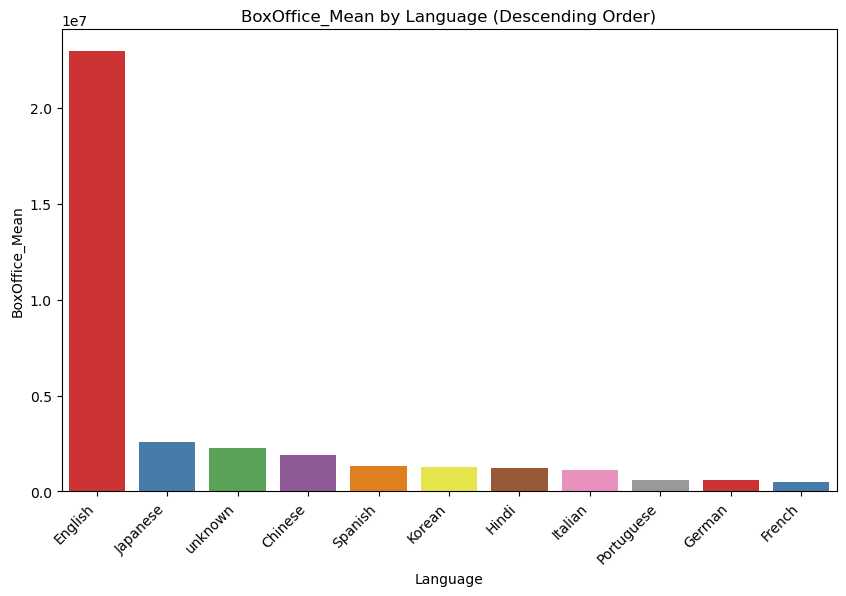

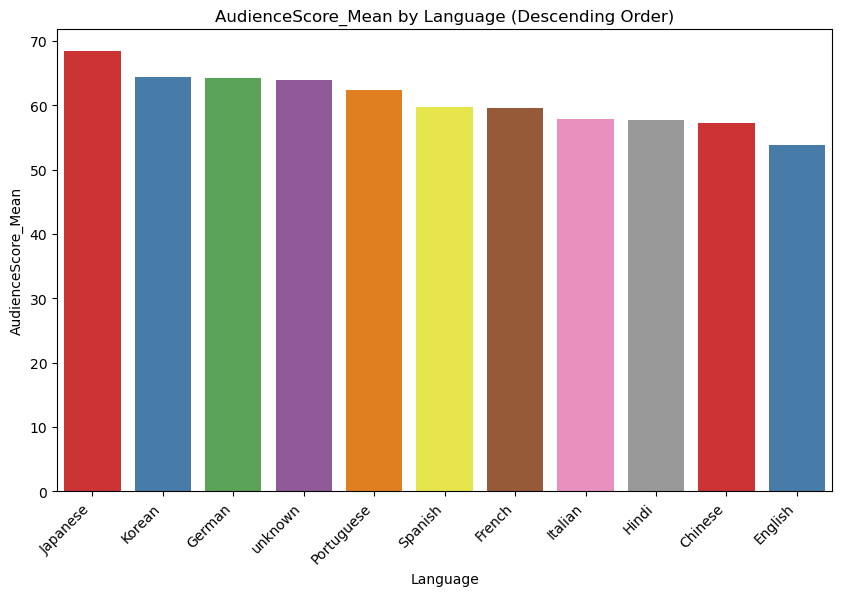

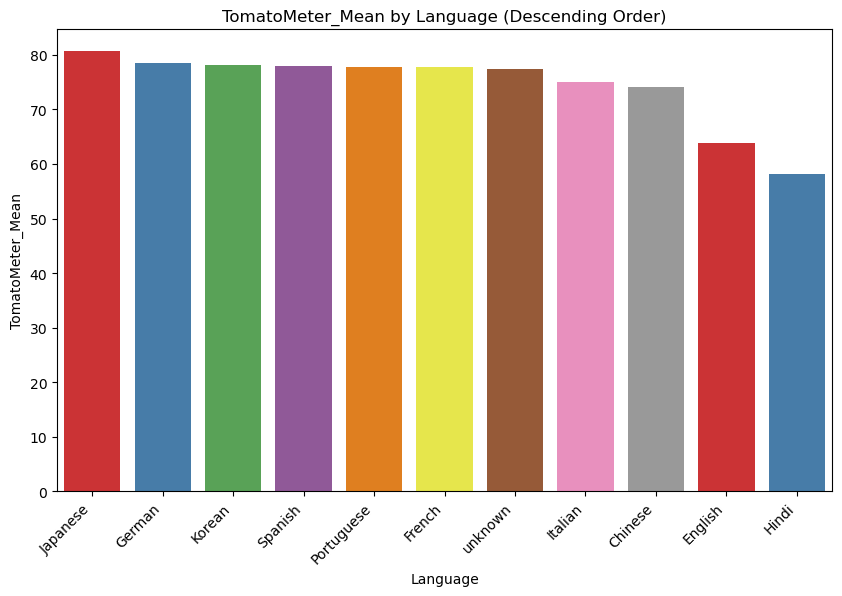

In [30]:
for col in result_df.columns[1:]:
    sorted_df = result_df.sort_values(by=col, ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Language', y=col, data=sorted_df, palette='Set1')
    plt.title(f'{col} by Language (Descending Order)')
    plt.xlabel('Language')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()

The difference in the mean boxoffice income for English compared to the other languages is huge, but they have a worse score on ratings. Japanese movies seem to be particularly appreciated both from the critics and the audience, while Hindi movies are tendentially particularly non-appreciated especially from the critique.

RATINGS

In [31]:
films['rating'].value_counts()

unknown    128905
R            7733
PG-13        3445
PG           1910
other         898
Name: rating, dtype: int64

In [32]:
ratings = ['R', 'PG-13', 'PG', 'unknown', 'other']
means_box_office = []
means_tomato_meter = []
means_audience_score = []

for rating in ratings:
    subset = films[films['rating'] == rating]
    
    non_zero_scores_box_office = subset['boxOffice'][subset['boxOffice'] != 0]    
    non_zero_scores_audience = subset['audienceScore'][subset['audienceScore'] != 0]
    non_zero_scores_tomato = subset['tomatoMeter'][subset['tomatoMeter'] != 0]
    
    mean_score_box_office = non_zero_scores_box_office.mean()  
    mean_score_audience = non_zero_scores_audience.mean()    
    mean_score_tomato = non_zero_scores_tomato.mean()

    means_box_office.append(mean_score_box_office)   
    means_audience_score.append(mean_score_audience)
    means_tomato_meter.append(mean_score_tomato)

result_df_ratings = pd.DataFrame({
    'Rating': ratings,
    'BoxOffice_Mean': means_box_office,
    'AudienceScore_Mean': means_audience_score,
    'TomatoMeter_Mean': means_tomato_meter
})

In [33]:
result_df_ratings

,Rating,BoxOffice_Mean,AudienceScore_Mean,TomatoMeter_Mean
0,R,1.527034e+07,50.073668,57.115650
1,PG-13,4.681682e+07,59.231521,52.801107
2,PG,4.509071e+07,60.884383,58.669014
3,unknown,8.492662e+06,57.142884,71.307323
4,other,1.777380e+06,50.351351,60.440000


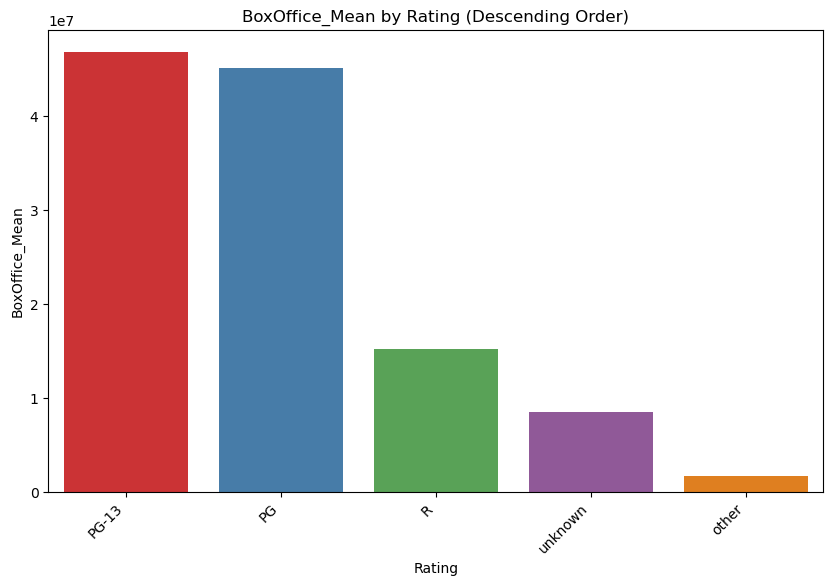

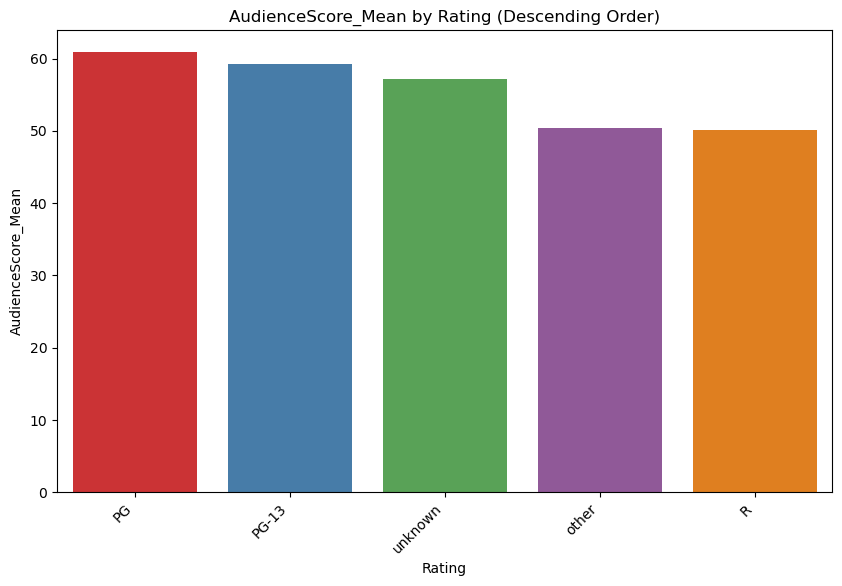

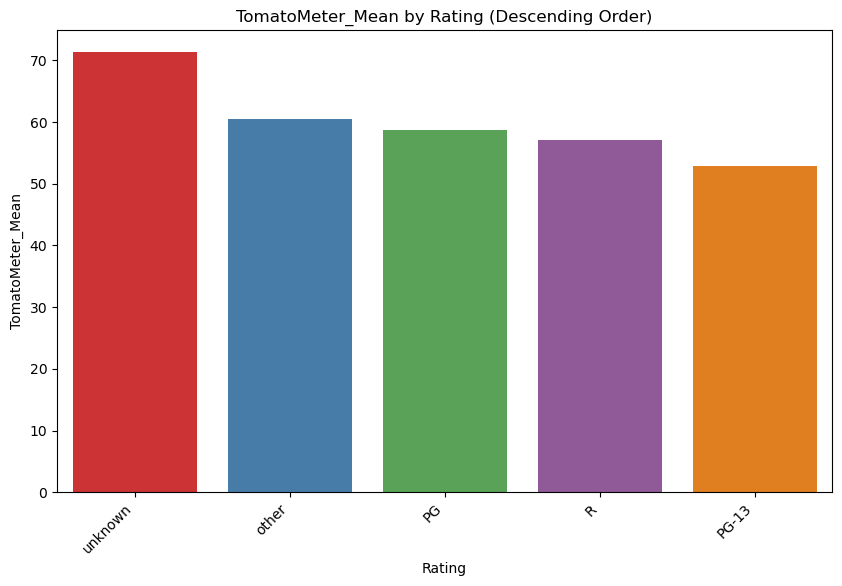

In [34]:
for col in result_df_ratings.columns[1:]:
    sorted_df = result_df_ratings.sort_values(by=col, ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Rating', y=col, data=sorted_df, palette='Set1')
    plt.title(f'{col} by Rating (Descending Order)')
    plt.xlabel('Rating')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()

It seems that mild restricted films permorm better on bax office and audience score. Unknown films score better on the critique, this may due because unknown ratings film are probably tendendentially older than rated movies.

Time Analysis: Now, I will see the different results through time

In [35]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],1800-01-01,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],1800-01-01,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],1800-01-01,1800-01-01,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],1800-01-01,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],1800-01-01,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,0


To simplify my analysis, I will extract the year from both releaseDateTheaters and releaseDateStreaming. The month would only have a relevance for box office results, but this is not my main focus of this analysis

In [36]:
films['releaseDateTheaters'] = pd.to_datetime(films['releaseDateTheaters'])
films['releaseDateStreaming'] = pd.to_datetime(films['releaseDateStreaming'])

films['ReleaseYearTheaters'] = films['releaseDateTheaters'].dt.year
films['ReleaseYearStreaming'] = films['releaseDateStreaming'].dt.year

In [37]:
films['ReleaseYearTheaters'].value_counts()

1800    112129
2019      1339
2018      1257
2017      1187
2022      1158
         ...  
2026         1
2028         1
1905         1
1903         1
2032         1
Name: ReleaseYearTheaters, Length: 126, dtype: int64

In [38]:
films['ReleaseYearStreaming'].value_counts()

1800    63511
2017    12070
2016     8195
2020     7360
2019     6539
        ...  
1975        1
1989        1
1928        1
1983        1
1971        1
Name: ReleaseYearStreaming, Length: 40, dtype: int64

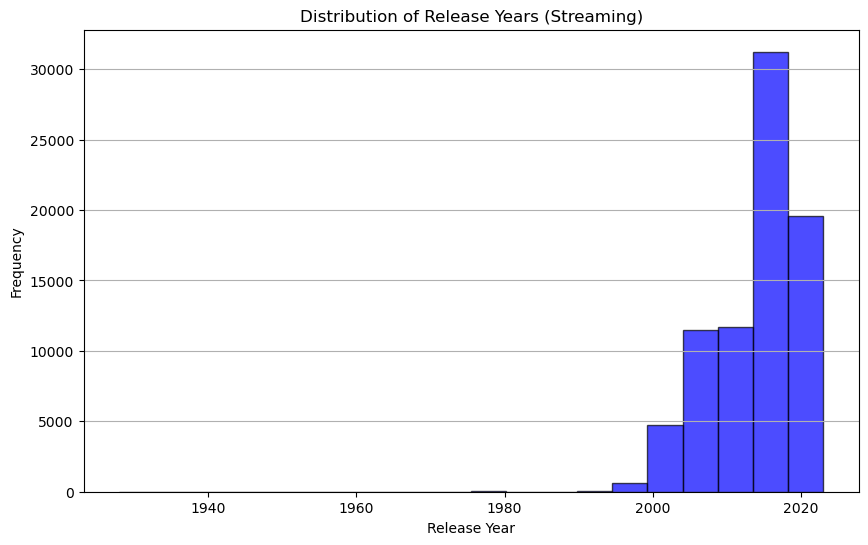

In [39]:
filtered_years = films['ReleaseYearStreaming'][(films['ReleaseYearStreaming'] != 1800)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_years, bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.title('Distribution of Release Years (Streaming)')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True, axis='y')

plt.show()

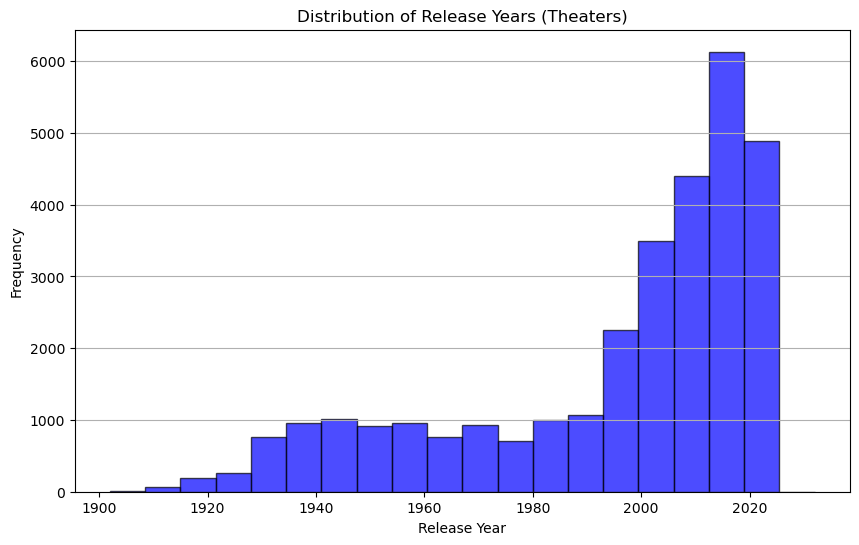

In [40]:
filtered_years = films['ReleaseYearTheaters'][(films['ReleaseYearTheaters'] != 1800)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_years, bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.title('Distribution of Release Years (Theaters)')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True, axis='y')

plt.show()

The data we have is right imbalanced, there are more recent movies than older ones. Probably nowadays we produce more films than in the past. For the modeling I can ordinal encode this.

Starting meanwhile the preparation for the clustering. Saving the variable with the original data before treating

In [41]:
original_films = films

GENRE

Now, I can drop the release date for both theaters and streaming. The original value is stored in the new variable

In [42]:
films.drop(['releaseDateTheaters', 'releaseDateStreaming'], axis=1, inplace=True)

In [43]:
films['genre'].value_counts()

Drama                                          27842
Documentary                                    15155
Comedy                                         11509
unknown                                        10783
Mystery & thriller                              7009
                                               ...  
Fantasy, Drama, Musical                            1
Holiday, Drama, Musical                            1
Drama, War, Adventure, Action                      1
Action, Adventure, Comedy, Drama, Animation        1
Western, Comedy, Animation                         1
Name: genre, Length: 2912, dtype: int64

In [44]:
films['genre_list'] = films['genre'].str.split(', | & ')
films['num_genres'] = films['genre_list'].apply(len)

In [45]:
unique_genres = set(genre for genres in films['genre_list'] for genre in genres)

In [46]:
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Anime',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Entertainment',
 'Faith',
 'Fantasy',
 'Foreign',
 'Gay',
 'Health',
 'History',
 'Holiday',
 'Horror',
 'Kids',
 'Lgbtq+',
 'Music',
 'Musical',
 'Mystery',
 'Nature',
 'News',
 'Other',
 'Reality',
 'Romance',
 'Sci-fi',
 'Short',
 'Special interest',
 'Sports',
 'Stand-up',
 'Variety',
 'War',
 'Western',
 'family',
 'fitness',
 'lesbian',
 'spirituality',
 'thriller',
 'unknown',
 'wellness'}

In [47]:
for genre in unique_genres:
    films[genre] = films['genre_list'].apply(lambda x: 1 if genre in x else 0)

In [48]:
for genre in unique_genres:
    films.rename(columns={genre: f'g_{genre}'}, inplace=True)

In [49]:
pd.set_option('display.max_columns', None)
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Variety,g_Holiday,g_History,g_Short,g_Health,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_lesbian,g_spirituality,g_thriller,g_Drama,g_War,g_Sci-fi,g_fitness,g_Comedy,g_wellness,g_Mystery,g_Gay,g_Faith,g_Special interest,g_Music,g_Western,g_Action,g_Horror,g_Entertainment,g_unknown,g_Foreign,g_Adventure,g_Musical,g_Reality,g_Biography,g_Kids,g_Nature,g_Anime,g_Lgbtq+,g_News,g_Animation,g_Other,g_Documentary,g_Stand-up
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
films.drop(['genre'], axis=1, inplace=True)

In [51]:
genre_cols = films.filter(like='g_')

In [52]:
for col in genre_cols:
    count_of_ones = (films[col] == 1).sum()
    print(f"{col}: {count_of_ones}")

g_Variety: 10
g_Holiday: 1815
g_History: 2259
g_Short: 19
g_Health: 4
g_Fantasy: 4585
g_family: 3435
g_Sports: 104
g_Romance: 10854
g_Crime: 6362
g_lesbian: 22
g_spirituality: 3
g_thriller: 18180
g_Drama: 55566
g_War: 1818
g_Sci-fi: 4435
g_fitness: 64
g_Comedy: 30062
g_wellness: 4
g_Mystery: 18180
g_Gay: 22
g_Faith: 3
g_Special interest: 8
g_Music: 1468
g_Western: 2842
g_Action: 11180
g_Horror: 11025
g_Entertainment: 3
g_unknown: 10783
g_Foreign: 77
g_Adventure: 7768
g_Musical: 2501
g_Reality: 2
g_Biography: 3191
g_Kids: 3435
g_Nature: 25
g_Anime: 725
g_Lgbtq+: 1338
g_News: 1
g_Animation: 3312
g_Other: 21
g_Documentary: 18898
g_Stand-up: 221


I am going to drop all genre columns that have less than 100 occurencies and insert a new one with other to keep track of this + g_mystery which is too similar to thriller

In [53]:
columns_to_drop = [col for col in genre_cols if (films[col] == 1).sum() < 100]

In [54]:
columns_to_drop.append('g_Mystery')

In [55]:
columns_to_drop

['g_Variety',
 'g_Short',
 'g_Health',
 'g_lesbian',
 'g_spirituality',
 'g_fitness',
 'g_wellness',
 'g_Gay',
 'g_Faith',
 'g_Special interest',
 'g_Entertainment',
 'g_Foreign',
 'g_Reality',
 'g_Nature',
 'g_News',
 'g_Other',
 'g_Mystery']

In [56]:
films['g_other'] = films[columns_to_drop].any(axis=1).astype(int)

In [57]:
films.drop(columns=columns_to_drop, inplace=True)

I am going to compare the 5 most frequent genres: 

In [58]:
genre_cols = [col for col in films.columns if col.startswith('g_')]
means_box_office = []
means_tomato_meter = []
means_audience_score = []

for col in genre_cols:
    subset = films[films[col] == 1]
    non_zero_scores_box_office = subset['boxOffice'][subset['boxOffice'] != 0]    
    non_zero_scores_audience = subset['audienceScore'][subset['audienceScore'] != 0]
    non_zero_scores_tomato = subset['tomatoMeter'][subset['tomatoMeter'] != 0]
    
    mean_score_box_office = non_zero_scores_box_office.mean()  
    mean_score_audience = non_zero_scores_audience.mean()    
    mean_score_tomato = non_zero_scores_tomato.mean()
    
    means_box_office.append(mean_score_box_office)   
    means_audience_score.append(mean_score_audience)
    means_tomato_meter.append(mean_score_tomato)

In [59]:
top_5_genres = films[genre_cols].sum().nlargest(5)

In [60]:
top_5_genres

g_Drama          55566
g_Comedy         30062
g_Documentary    18898
g_other          18425
g_thriller       18180
dtype: int64

In [61]:
means_box_office = []
means_tomato_meter = []
means_audience_score = []

for genre in top_5_genres.index:
    subset = films[films[genre] == 1]
    
    non_zero_scores_box_office = subset['boxOffice'][subset['boxOffice'] != 0]    
    non_zero_scores_audience = subset['audienceScore'][subset['audienceScore'] != 0]
    non_zero_scores_tomato = subset['tomatoMeter'][subset['tomatoMeter'] != 0]
    
    mean_score_box_office = non_zero_scores_box_office.mean()  
    mean_score_audience = non_zero_scores_audience.mean()    
    mean_score_tomato = non_zero_scores_tomato.mean()

    means_box_office.append(mean_score_box_office)   
    means_audience_score.append(mean_score_audience)
    means_tomato_meter.append(mean_score_tomato)

result_df_genres = pd.DataFrame({
    'Genre': top_5_genres.index,
    'BoxOffice_Mean': means_box_office,
    'AudienceScore_Mean': means_audience_score,
    'TomatoMeter_Mean': means_tomato_meter
})


In [62]:
result_df_genres.head()

,Genre,BoxOffice_Mean,AudienceScore_Mean,TomatoMeter_Mean
0,g_Drama,1.001903e+07,60.961407,69.313387
1,g_Comedy,2.368124e+07,55.885111,60.789230
2,g_Documentary,1.355611e+06,74.177978,84.319953
3,g_other,2.270563e+07,46.376491,59.161336
4,g_thriller,2.272689e+07,46.225353,58.816615


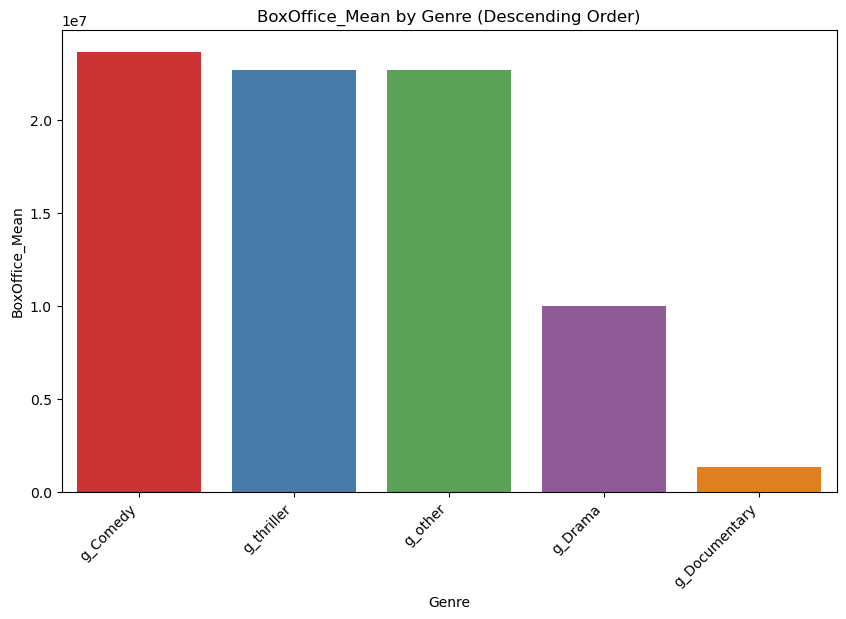

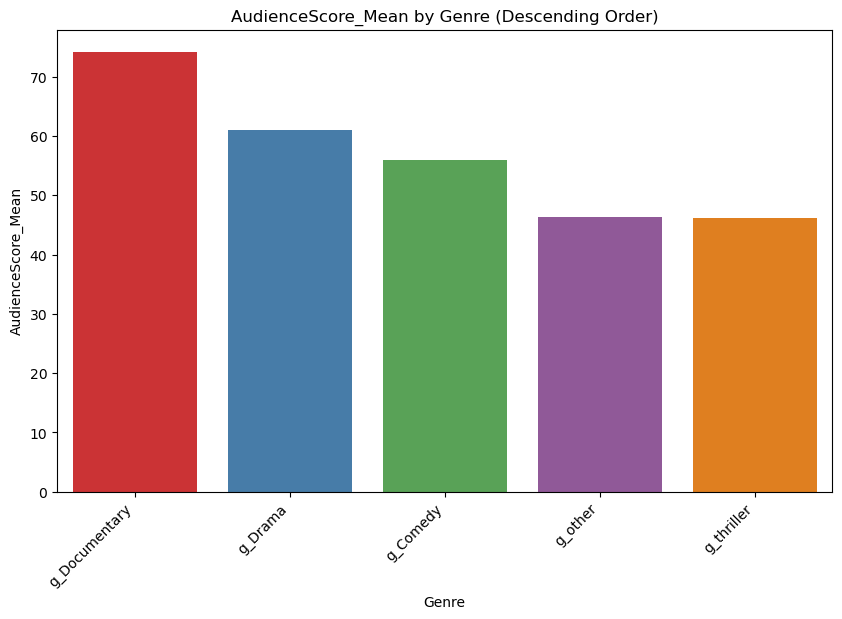

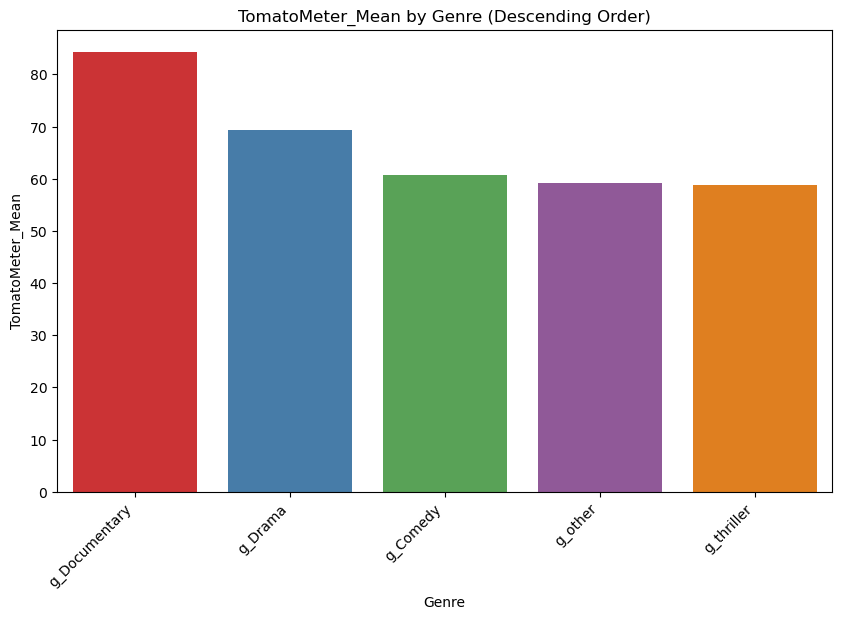

In [63]:
for col in result_df_genres.columns[1:]:
    sorted_df = result_df_genres.sort_values(by=col, ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Genre', y=col, data=sorted_df, palette='Set1')
    plt.title(f'{col} by Genre (Descending Order)')
    plt.xlabel('Genre')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()

Documentaries seem to be much appreciated both from the critique and the audience, but they make by far the least box office income. Action movies are the opposite.

In [64]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


Let's do the same for director and writer. I will include only the 50 most frequently directors

In [65]:
directors_split = films['director'].str.split(',').explode()
director_counts = directors_split.value_counts()
print(director_counts.head(50))

Unknown Director    7447
David DeCoteau       135
Sam Newfield         125
Fred Olen Ray         95
Michael Curtiz        85
                    ... 
Roger Corman          49
Woody Allen           48
David Butler          48
Frank Borzage         48
                      48
Name: director, Length: 50, dtype: int64


In [66]:
top_50_directors = director_counts.head(50).index.tolist()

In [67]:
writers_split = films['writer'].str.split(',').explode()
writers_counts = writers_split.value_counts()
print(director_counts.head(50))

Unknown Director    7447
David DeCoteau       135
Sam Newfield         125
Fred Olen Ray         95
Michael Curtiz        85
                    ... 
Roger Corman          49
Woody Allen           48
David Butler          48
Frank Borzage         48
                      48
Name: director, Length: 50, dtype: int64


In [68]:
top_50_directors = director_counts.head(50).index.tolist()

In [69]:
top_50_writers = writers_counts.head(50).index.tolist()

In [70]:
films.shape

(142891, 42)

In [71]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [72]:
films['director_list'] = films['director'].str.split(',')
films['num_directors'] = films['director_list'].apply(len)

In [73]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other,director_list,num_directors
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[George Ormrod],1
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Park Heung-Sik, Heung-Sik Park]",2
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,[John Michael McCarthy],1
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,[Will Meugniot],1


In [74]:
top_50_directors

['Unknown Director',
 'David DeCoteau',
 'Sam Newfield',
 'Fred Olen Ray',
 'Michael Curtiz',
 'Joseph Kane',
 'Lesley Selander',
 'Richard Thorpe',
 'John Ford',
 'Cheh Chang',
 'Raoul Walsh',
 'Takashi Miike',
 'Michael Feifer',
 'Jean-Luc Godard',
 'Gordon Douglas',
 'Jim Wynorski',
 'Lloyd Bacon',
 'George Sherman',
 'Jing Wong',
 'William A. Wellman',
 'Terry Ingram',
 'William Witney',
 'William Beaudine',
 'William A. Seiter',
 'Mervyn LeRoy',
 'Alfred Hitchcock',
 'Charlie Chaplin',
 'George Marshall',
 'Godfrey Ho',
 'Alfred E. Green',
 'Norman Taurog',
 'Henry Hathaway',
 'Ray Taylor',
 'Allan Dwan',
 'Werner Herzog',
 'George Cukor',
 'D.W. Griffith',
 'Claude Chabrol',
 'Paul Wendkos',
 'Lew Landers',
 'William Nigh',
 'Phil Rosen',
 'Roy Del Ruth',
 'Johnnie To',
 'George Archainbaud',
 'Roger Corman',
 'Woody Allen',
 'David Butler',
 'Frank Borzage',
 '']

In [75]:
top_50_directors.remove('Unknown Director')

In [76]:
films['director_list']

0                          [George Ormrod]
1                        [Tiffany Edwards]
2         [Park Heung-Sik, Heung-Sik Park]
3                  [John Michael McCarthy]
4                          [Will Meugniot]
                        ...               
142886                          [Sho Aono]
142887                  [Andrew Behringer]
142888                      [Peter Georgi]
142889                    [Robert F. Hill]
142890                  [David J. Francis]
Name: director_list, Length: 142891, dtype: object

In [77]:
for director in top_50_directors:
    col_title = 'd_' + director
    films[col_title] = films['director_list'].apply(lambda x: 1 if genre in x else 0)

In [78]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other,director_list,num_directors,d_David DeCoteau,d_Sam Newfield,d_Fred Olen Ray,d_Michael Curtiz,d_Joseph Kane,d_Lesley Selander,d_Richard Thorpe,d_John Ford,d_Cheh Chang,d_Raoul Walsh,d_Takashi Miike,d_Michael Feifer,d_Jean-Luc Godard,d_Gordon Douglas,d_Jim Wynorski,d_Lloyd Bacon,d_George Sherman,d_Jing Wong,d_William A. Wellman,d_Terry Ingram,d_William Witney,d_William Beaudine,d_William A. Seiter,d_Mervyn LeRoy,d_Alfred Hitchcock,d_Charlie Chaplin,d_George Marshall,d_Godfrey Ho,d_Alfred E. Green,d_Norman Taurog,d_Henry Hathaway,d_Ray Taylor,d_Allan Dwan,d_Werner Herzog,d_George Cukor,d_D.W. Griffith,d_Claude Chabrol,d_Paul Wendkos,d_Lew Landers,d_William Nigh,d_Phil Rosen,d_Roy Del Ruth,d_Johnnie To,d_George Archainbaud,d_Roger Corman,d_Woody Allen,d_David Butler,d_Frank Borzage,d_
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[George Ormrod],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Park Heung-Sik, Heung-Sik Park]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,[Will Meugniot],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
films['writer_list'] = films['writer'].str.split(',')
films['num_writers'] = films['writer_list'].apply(len)

In [80]:
top_50_writers

['Unknown Writer',
 '',
 'Kuang Ni',
 'Christine Conradt',
 'Barbara Kymlicka',
 'Jing Wong',
 'Luc Besson',
 'Jean-Claude Carrière',
 'Mark Monroe',
 'Jean-Luc Godard',
 'Robin Bhatt',
 'Woody Allen',
 'H. M. Walker',
 'Tonino Guerra',
 'Peter Sullivan',
 'Werner Herzog',
 'Charlie Chaplin',
 'Ingmar Bergman',
 'Ben Hecht',
 'William Shakespeare',
 'Jake Helgren',
 'Rafael Azcona',
 'Teena Booth',
 'Rolfe Kanefsky',
 'Hayao Miyazaki',
 'Marcy Holland',
 'Anders Thomas Jensen',
 'Ernesto Gastaldi',
 'Michael Feifer',
 'Neal H. Dobrofsky',
 'Rainer Werner Fassbinder',
 'Tippi Dobrofsky',
 'Akira Kurosawa',
 'Frances Marion',
 'Sachin Bhowmick',
 'Adam Rockoff',
 'Brittany Wiscombe',
 'Abbas Kiarostami',
 'Nunnally Johnson',
 'Nina Weinman',
 'Yôji Yamada',
 'François Ozon',
 'Billy Wilder',
 'Gregg Rossen',
 'Manoel de Oliveira',
 'Tyler Perry',
 'Hong Sang-soo',
 'John Hughes',
 'Agnès Varda',
 'Tracy Andreen']

In [81]:
top_50_writers.remove('Unknown Writer')
top_50_writers.remove('')

In [82]:
top_50_writers

['Kuang Ni',
 'Christine Conradt',
 'Barbara Kymlicka',
 'Jing Wong',
 'Luc Besson',
 'Jean-Claude Carrière',
 'Mark Monroe',
 'Jean-Luc Godard',
 'Robin Bhatt',
 'Woody Allen',
 'H. M. Walker',
 'Tonino Guerra',
 'Peter Sullivan',
 'Werner Herzog',
 'Charlie Chaplin',
 'Ingmar Bergman',
 'Ben Hecht',
 'William Shakespeare',
 'Jake Helgren',
 'Rafael Azcona',
 'Teena Booth',
 'Rolfe Kanefsky',
 'Hayao Miyazaki',
 'Marcy Holland',
 'Anders Thomas Jensen',
 'Ernesto Gastaldi',
 'Michael Feifer',
 'Neal H. Dobrofsky',
 'Rainer Werner Fassbinder',
 'Tippi Dobrofsky',
 'Akira Kurosawa',
 'Frances Marion',
 'Sachin Bhowmick',
 'Adam Rockoff',
 'Brittany Wiscombe',
 'Abbas Kiarostami',
 'Nunnally Johnson',
 'Nina Weinman',
 'Yôji Yamada',
 'François Ozon',
 'Billy Wilder',
 'Gregg Rossen',
 'Manoel de Oliveira',
 'Tyler Perry',
 'Hong Sang-soo',
 'John Hughes',
 'Agnès Varda',
 'Tracy Andreen']

In [83]:
for writer in top_50_writers:
    col_title = 'w_' + writer
    films[col_title] = films['writer_list'].apply(lambda x: 1 if genre in x else 0)

/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_61200/2879346528.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  films[col_title] = films['writer_list'].apply(lambda x: 1 if genre in x else 0)
/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_61200/2879346528.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  films[col_title] = films['writer_list'].apply(lambda x: 1 if genre in x else 0)
/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_61200/2879346528.py:3: PerformanceWarning: DataFrame is hig

In [84]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other,director_list,num_directors,d_David DeCoteau,d_Sam Newfield,d_Fred Olen Ray,d_Michael Curtiz,d_Joseph Kane,d_Lesley Selander,d_Richard Thorpe,d_John Ford,d_Cheh Chang,d_Raoul Walsh,d_Takashi Miike,d_Michael Feifer,d_Jean-Luc Godard,d_Gordon Douglas,d_Jim Wynorski,d_Lloyd Bacon,d_George Sherman,d_Jing Wong,d_William A. Wellman,d_Terry Ingram,d_William Witney,d_William Beaudine,d_William A. Seiter,d_Mervyn LeRoy,d_Alfred Hitchcock,d_Charlie Chaplin,d_George Marshall,d_Godfrey Ho,d_Alfred E. Green,d_Norman Taurog,d_Henry Hathaway,d_Ray Taylor,d_Allan Dwan,d_Werner Herzog,d_George Cukor,d_D.W. Griffith,d_Claude Chabrol,d_Paul Wendkos,d_Lew Landers,d_William Nigh,d_Phil Rosen,d_Roy Del Ruth,d_Johnnie To,d_George Archainbaud,d_Roger Corman,d_Woody Allen,d_David Butler,d_Frank Borzage,d_,writer_list,num_writers,w_Kuang Ni,w_Christine Conradt,w_Barbara Kymlicka,w_Jing Wong,w_Luc Besson,w_Jean-Claude Carrière,w_Mark Monroe,w_Jean-Luc Godard,w_Robin Bhatt,w_Woody Allen,w_H. M. Walker,w_Tonino Guerra,w_Peter Sullivan,w_Werner Herzog,w_Charlie Chaplin,w_Ingmar Bergman,w_Ben Hecht,w_William Shakespeare,w_Jake Helgren,w_Rafael Azcona,w_Teena Booth,w_Rolfe Kanefsky,w_Hayao Miyazaki,w_Marcy Holland,w_Anders Thomas Jensen,w_Ernesto Gastaldi,w_Michael Feifer,w_Neal H. Dobrofsky,w_Rainer Werner Fassbinder,w_Tippi Dobrofsky,w_Akira Kurosawa,w_Frances Marion,w_Sachin Bhowmick,w_Adam Rockoff,w_Brittany Wiscombe,w_Abbas Kiarostami,w_Nunnally Johnson,w_Nina Weinman,w_Yôji Yamada,w_François Ozon,w_Billy Wilder,w_Gregg Rossen,w_Manoel de Oliveira,w_Tyler Perry,w_Hong Sang-soo,w_John Hughes,w_Agnès Varda,w_Tracy Andreen
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[George Ormrod],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[George Ormrod, John Sabotta]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Park Heung-Sik, Heung-Sik Park]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Ha Young-Joon, Jeon Yun-su, Song Hye-jin]",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Anima

I am going to extract and Rating also the column rating content

In [85]:
films['ratingContents'].value_counts()

[]                                                                                             128905
['Language']                                                                                      365
['V']                                                                                             154
['Some Language']                                                                                 143
['Some Violence']                                                                                 126
                                                                                                ...  
['Language', 'Drug Material', 'Nudity', 'Sexual Content', 'Strong Violence']                        1
['A Disturbing Image', 'Some Thematic Material']                                                    1
['Pervasive Sexual Content', 'Aberrant Sexuality', 'Some Drug Material', 'Strong Language']         1
['Drinking', 'Crude Humor', 'Language', 'Strong Sexual Content']                  

In [86]:
value_counts = films['ratingContents'].value_counts()

# Display the first 20 values
top_20_values = value_counts.head(20)
print(top_20_values)

[]                                     128905
['Language']                              365
['V']                                     154
['Some Language']                         143
['Some Violence']                         126
['Violence']                              105
['L']                                     104
['V', 'L']                                103
['L', 'V']                                 93
['Violence', 'Language']                   81
['Brief Strong Language']                  81
['Sexual Content', 'Language']             80
['Language', 'Violence']                   69
['Some Sexual Content', 'Language']        57
['Language', 'Some Violence']              57
['Language', 'Sexual Content']             55
['Mild Thematic Elements']                 53
['Some Sexual Content']                    52
['Violence and Language']                  50
['Language', 'Some Sexual Content']        48
Name: ratingContents, dtype: int64


I am going to exclude this column from the clustering. It does not offer enough value compared to the size of this df

In [87]:
films.drop(['ratingContents'], axis=1, inplace=True)

In [88]:
films.head(50)

,id,title,audienceScore,tomatoMeter,rating,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other,director_list,num_directors,d_David DeCoteau,d_Sam Newfield,d_Fred Olen Ray,d_Michael Curtiz,d_Joseph Kane,d_Lesley Selander,d_Richard Thorpe,d_John Ford,d_Cheh Chang,d_Raoul Walsh,d_Takashi Miike,d_Michael Feifer,d_Jean-Luc Godard,d_Gordon Douglas,d_Jim Wynorski,d_Lloyd Bacon,d_George Sherman,d_Jing Wong,d_William A. Wellman,d_Terry Ingram,d_William Witney,d_William Beaudine,d_William A. Seiter,d_Mervyn LeRoy,d_Alfred Hitchcock,d_Charlie Chaplin,d_George Marshall,d_Godfrey Ho,d_Alfred E. Green,d_Norman Taurog,d_Henry Hathaway,d_Ray Taylor,d_Allan Dwan,d_Werner Herzog,d_George Cukor,d_D.W. Griffith,d_Claude Chabrol,d_Paul Wendkos,d_Lew Landers,d_William Nigh,d_Phil Rosen,d_Roy Del Ruth,d_Johnnie To,d_George Archainbaud,d_Roger Corman,d_Woody Allen,d_David Butler,d_Frank Borzage,d_,writer_list,num_writers,w_Kuang Ni,w_Christine Conradt,w_Barbara Kymlicka,w_Jing Wong,w_Luc Besson,w_Jean-Claude Carrière,w_Mark Monroe,w_Jean-Luc Godard,w_Robin Bhatt,w_Woody Allen,w_H. M. Walker,w_Tonino Guerra,w_Peter Sullivan,w_Werner Herzog,w_Charlie Chaplin,w_Ingmar Bergman,w_Ben Hecht,w_William Shakespeare,w_Jake Helgren,w_Rafael Azcona,w_Teena Booth,w_Rolfe Kanefsky,w_Hayao Miyazaki,w_Marcy Holland,w_Anders Thomas Jensen,w_Ernesto Gastaldi,w_Michael Feifer,w_Neal H. Dobrofsky,w_Rainer Werner Fassbinder,w_Tippi Dobrofsky,w_Akira Kurosawa,w_Frances Marion,w_Sachin Bhowmick,w_Adam Rockoff,w_Brittany Wiscombe,w_Abbas Kiarostami,w_Nunnally Johnson,w_Nina Weinman,w_Yôji Yamada,w_François Ozon,w_Billy Wilder,w_Gregg Rossen,w_Manoel de Oliveira,w_Tyler Perry,w_Hong Sang-soo,w_John Hughes,w_Agnès Varda,w_Tracy Andreen
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[George Ormrod],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[George Ormrod, John Sabotta]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Park Heung-Sik, Heung-Sik Park]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Ha Young-Joon, Jeon Yun-su, Song Hye-jin]",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,1,0,0,0,0,0,0,0,0

In [89]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,runtimeMinutes,originalLanguage,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other,director_list,num_directors,d_David DeCoteau,d_Sam Newfield,d_Fred Olen Ray,d_Michael Curtiz,d_Joseph Kane,d_Lesley Selander,d_Richard Thorpe,d_John Ford,d_Cheh Chang,d_Raoul Walsh,d_Takashi Miike,d_Michael Feifer,d_Jean-Luc Godard,d_Gordon Douglas,d_Jim Wynorski,d_Lloyd Bacon,d_George Sherman,d_Jing Wong,d_William A. Wellman,d_Terry Ingram,d_William Witney,d_William Beaudine,d_William A. Seiter,d_Mervyn LeRoy,d_Alfred Hitchcock,d_Charlie Chaplin,d_George Marshall,d_Godfrey Ho,d_Alfred E. Green,d_Norman Taurog,d_Henry Hathaway,d_Ray Taylor,d_Allan Dwan,d_Werner Herzog,d_George Cukor,d_D.W. Griffith,d_Claude Chabrol,d_Paul Wendkos,d_Lew Landers,d_William Nigh,d_Phil Rosen,d_Roy Del Ruth,d_Johnnie To,d_George Archainbaud,d_Roger Corman,d_Woody Allen,d_David Butler,d_Frank Borzage,d_,writer_list,num_writers,w_Kuang Ni,w_Christine Conradt,w_Barbara Kymlicka,w_Jing Wong,w_Luc Besson,w_Jean-Claude Carrière,w_Mark Monroe,w_Jean-Luc Godard,w_Robin Bhatt,w_Woody Allen,w_H. M. Walker,w_Tonino Guerra,w_Peter Sullivan,w_Werner Herzog,w_Charlie Chaplin,w_Ingmar Bergman,w_Ben Hecht,w_William Shakespeare,w_Jake Helgren,w_Rafael Azcona,w_Teena Booth,w_Rolfe Kanefsky,w_Hayao Miyazaki,w_Marcy Holland,w_Anders Thomas Jensen,w_Ernesto Gastaldi,w_Michael Feifer,w_Neal H. Dobrofsky,w_Rainer Werner Fassbinder,w_Tippi Dobrofsky,w_Akira Kurosawa,w_Frances Marion,w_Sachin Bhowmick,w_Adam Rockoff,w_Brittany Wiscombe,w_Abbas Kiarostami,w_Nunnally Johnson,w_Nina Weinman,w_Yôji Yamada,w_François Ozon,w_Billy Wilder,w_Gregg Rossen,w_Manoel de Oliveira,w_Tyler Perry,w_Hong Sang-soo,w_John Hughes,w_Agnès Varda,w_Tracy Andreen
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,75.0,English,George Ormrod,"George Ormrod,John Sabotta",0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[George Ormrod],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[George Ormrod, John Sabotta]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,114.0,English,Tiffany Edwards,Tiffany Edwards,0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Park Heung-Sik, Heung-Sik Park]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Ha Young-Joon, Jeon Yun-su, Song Hye-jin]",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,90.0,English,John Michael McCarthy,John Michael McCarthy,0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[John Michael McCarthy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,80.0,English,Will Meugniot,John Loy,0,1800,2017,"[Fantasy, Adventure, Animation]",3,0,0,1,0,0,0,0,0,0,0,0

Now, let's scale the numerical columns that still need scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['audienceScore', 'tomatoMeter', 'boxOffice']

scaler = MinMaxScaler()
films[columns_to_scale] = scaler.fit_transform(films[columns_to_scale])

In [100]:
films.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,director,writer,boxOffice,ReleaseYearTheaters,ReleaseYearStreaming,genre_list,num_genres,g_Holiday,g_History,g_Fantasy,g_family,g_Sports,g_Romance,g_Crime,g_thriller,g_Drama,g_War,g_Sci-fi,g_Comedy,g_Music,g_Western,g_Action,g_Horror,g_unknown,g_Adventure,g_Musical,g_Biography,g_Kids,g_Anime,g_Lgbtq+,g_Animation,g_Documentary,g_Stand-up,g_other,director_list,num_directors,d_David DeCoteau,d_Sam Newfield,d_Fred Olen Ray,d_Michael Curtiz,d_Joseph Kane,d_Lesley Selander,d_Richard Thorpe,d_John Ford,d_Cheh Chang,d_Raoul Walsh,d_Takashi Miike,d_Michael Feifer,d_Jean-Luc Godard,d_Gordon Douglas,d_Jim Wynorski,d_Lloyd Bacon,d_George Sherman,d_Jing Wong,d_William A. Wellman,d_Terry Ingram,d_William Witney,d_William Beaudine,d_William A. Seiter,d_Mervyn LeRoy,d_Alfred Hitchcock,d_Charlie Chaplin,d_George Marshall,d_Godfrey Ho,d_Alfred E. Green,d_Norman Taurog,d_Henry Hathaway,d_Ray Taylor,d_Allan Dwan,d_Werner Herzog,d_George Cukor,d_D.W. Griffith,d_Claude Chabrol,d_Paul Wendkos,d_Lew Landers,d_William Nigh,d_Phil Rosen,d_Roy Del Ruth,d_Johnnie To,d_George Archainbaud,d_Roger Corman,d_Woody Allen,d_David Butler,d_Frank Borzage,d_,writer_list,num_writers,w_Kuang Ni,w_Christine Conradt,w_Barbara Kymlicka,w_Jing Wong,w_Luc Besson,w_Jean-Claude Carrière,w_Mark Monroe,w_Jean-Luc Godard,w_Robin Bhatt,w_Woody Allen,w_H. M. Walker,w_Tonino Guerra,w_Peter Sullivan,w_Werner Herzog,w_Charlie Chaplin,w_Ingmar Bergman,w_Ben Hecht,w_William Shakespeare,w_Jake Helgren,w_Rafael Azcona,w_Teena Booth,w_Rolfe Kanefsky,w_Hayao Miyazaki,w_Marcy Holland,w_Anders Thomas Jensen,w_Ernesto Gastaldi,w_Michael Feifer,w_Neal H. Dobrofsky,w_Rainer Werner Fassbinder,w_Tippi Dobrofsky,w_Akira Kurosawa,w_Frances Marion,w_Sachin Bhowmick,w_Adam Rockoff,w_Brittany Wiscombe,w_Abbas Kiarostami,w_Nunnally Johnson,w_Nina Weinman,w_Yôji Yamada,w_François Ozon,w_Billy Wilder,w_Gregg Rossen,w_Manoel de Oliveira,w_Tyler Perry,w_Hong Sang-soo,w_John Hughes,w_Agnès Varda,w_Tracy Andreen,originalLanguage_Chinese,originalLanguage_English,originalLanguage_French,originalLanguage_German,originalLanguage_Hindi,originalLanguage_Italian,originalLanguage_Japanese,originalLanguage_Korean,originalLanguage_Portuguese,originalLanguage_Spanish,originalLanguage_other,originalLanguage_unknown,rating_PG,rating_PG-13,rating_R,rating_other,rating_unknown
0,space-zombie-bingo,Space Zombie Bingo!,0.50,0.0,75.0,George Ormrod,"George Ormrod,John Sabotta",0.0,1800,2018,"[Comedy, Horror, Sci-fi]",3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[George Ormrod],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[George Ormrod, John Sabotta]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,the_green_grass,The Green Grass,0.00,0.0,114.0,Tiffany Edwards,Tiffany Edwards,0.0,1800,2020,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Tiffany Edwards],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,love_lies,"Love, Lies",0.43,0.0,120.0,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0.0,1800,1800,[Drama],1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Park Heung-Sik, Heung-Sik Park]",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Ha Young-Joon, Jeon Yun-su, Song Hye-jin]",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,the_sore_losers_1997,Sore Losers,0.60,0.0,90.0,John Michael McCarthy,John Michael McCarthy,0.0,1800,2020,"[Action, Mystery, thriller]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,[John Michael McCarthy],1,

I am going to onehotencode the following columns: originalLanguage, rating. i can use get_dummies, I do not need to store the encoder

In [99]:
films.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'runtimeMinutes',
       'director', 'writer', 'boxOffice', 'ReleaseYearTheaters',
       'ReleaseYearStreaming',
       ...
       'originalLanguage_Korean', 'originalLanguage_Portuguese',
       'originalLanguage_Spanish', 'originalLanguage_other',
       'originalLanguage_unknown', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_other', 'rating_unknown'],
      dtype='object', length=157)

In [95]:
films = pd.get_dummies(films, columns=['originalLanguage', 'rating'])

KeyError: "None of [Index(['originalLanguage', 'rating'], dtype='object')] are in the [columns]"

In [ ]:
films.head(50)